# Exercises Sheet 3 Reinforcement Learning

# Ex 1

Iteration 0
                   
O                  
                   
                   
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 100
                   
                   
                   
                   
                   
O                  
                   
                   
                   
                  X

--------------------
Iteration 200
                   
                   
                   
                   
                   
                   
                   
                  O
                   
                  X

--------------------
Iteration 300
                   
                   
                   
                   
                   
  O                
                   
                   
                   
                  X

--------------------
Reached the goal!
Iteration 0
O                  
        

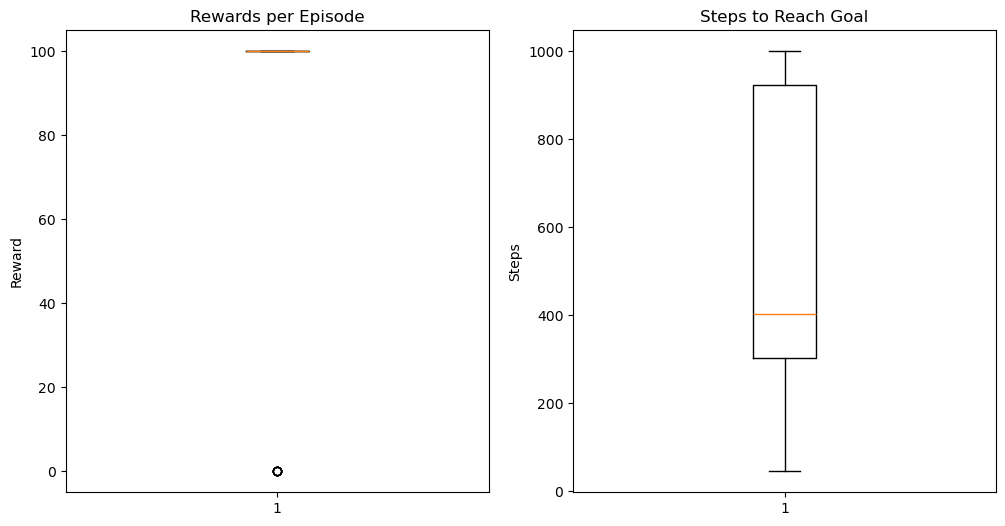

Average Reward per Episode: 80.0
Average Steps to Goal: 538.7666666666667
Standard Deviation of Steps: 313.57685749359047


In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time  # Optional delay for visualizing matrix updates

class Environment:
    def __init__(self):
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((10, 10), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.goal_state = [9, 9]  # Goal at bottom-right corner
        self.max_steps = 1000  # Maximum steps per episode

    def transition(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == "up" and state[0] > 0: # linhas
            state[0] -= 1 # linhas - 1
        elif action == "down" and state[0] <  self.field.shape[0] - 1: # linhas
            state[0] += 1 # linhas + 1
        elif action == "left" and state[1] > 0:
            state[1] -= 1 # colunas - 1
        elif action == "right" and state[1] < self.field.shape[1] - 1:
            state[1] += 1 # colunas + 1
        return state

    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent:
    def __init__(self, environment):
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = ["up", "down", "left", "right"]

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            action = self.choose_random_action()
            new_state = self.env.transition(self.current_state, action)
            total_reward += self.env.reward(new_state)
            steps += 1
            

            # Print the matrix every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}")
                self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal!")
                break

        self.reset()
        return total_reward, steps

# Run simulation for 30 episodes
def simulate(agent, num_episodes=30):
    rewards, steps_list = [], []

    for _ in range(num_episodes):
        reward, steps = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)

    print(f"Reward: {rewards}")
    print(f"Steps: {steps_list}")

    return rewards, steps_list


def plot_analyze(rewards, steps_list):
    """Use to analyze results."""
    # Calculate statistics
    avg_reward = np.mean(rewards)
    avg_steps = np.mean(steps_list)
    std_steps = np.std(steps_list)

    # Plotting the results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].boxplot(rewards, vert=True)
    ax[0].set_title("Rewards per Episode")
    ax[0].set_ylabel("Reward")

    ax[1].boxplot(steps_list, vert=True)
    ax[1].set_title("Steps to Reach Goal")
    ax[1].set_ylabel("Steps")

    plt.show()

    print(f"Average Reward per Episode: {avg_reward}")
    print(f"Average Steps to Goal: {avg_steps}")
    print(f"Standard Deviation of Steps: {std_steps}")

# Initialize environment and agent
env = Environment()
agent = Agent(env)

# Run the simulation
rewards, steps_list = simulate(agent)
plot_analyze(rewards, steps_list)

# Ex 2

                   
                   
                   
                   
                   
                   
                   
                   
                   
                   

Greed at 0.9: (not very random)


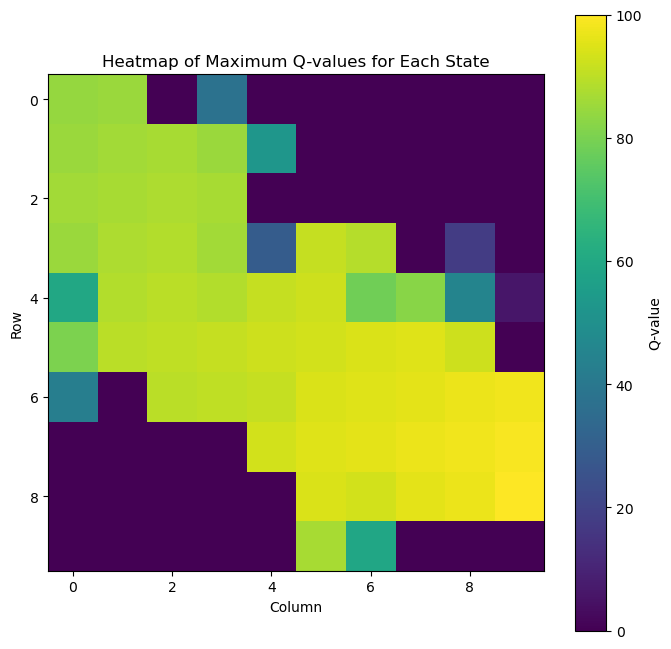

[[ 84.29431934  85.14507337   0.          37.71038292   0.
    0.           0.           0.           0.           0.        ]
 [ 85.14577711  86.00583546  86.87458128  85.05913907  52.67351371
    0.           0.           0.           0.           0.        ]
 [ 86.00583546  86.87458128  87.7521023   86.87458128   0.
    0.           0.           0.           0.           0.        ]
 [ 85.14577589  87.7521023   88.63848717  86.00582063  29.24581643
   91.34715254  88.96818276   0.          17.68713646   0.        ]
 [ 59.76795688  88.63833015  89.53382543  88.63848717  91.35172471
   92.27446944  78.15060952  82.17617818  44.96269702   5.95777228]
 [ 80.46501457  89.53366682  90.4382075   91.35172475  92.27446944
   93.20653479  94.14801494  95.09900499  92.53991493   0.        ]
 [ 42.89404238   0.          89.53380982  90.41750132  91.35172475
   94.14801494  95.09900499  96.059601    97.0299      98.00873247]
 [  0.           0.           0.           0.          93.11240546
   9

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt

a = 0.7
y = 0.99
greed = 0.9 # if closer to 1, then it goes to the best option

class Environment2:
    def __init__(self, size=10): # default should be 10
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((size, size), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.size = size

        self.goal_state = [size-1, size-1]  # Goal at bottom-right corner
        self.max_steps = size * 2000  # Maximum steps per episode

        # Print the field
        self.print_field()

    def add_walls(self):
        # Add the vertical walls
        self.field[1:, self.size-4] = 'W'  # Wall bottom up
        self.field[:-1, 3] = 'W'  # Wall from top to bottom

    #def add_walls(self):
        # Define the vertical walls using the dimensions of self.field
    #    self.field[:-1, self.field.shape[1] - 2] = 'W'  # Wall from top to bottom in the second column from the right
    #    self.field[1:, 1] = 'W'  # Wall from bottom up in the second column from the left


    def print_field(self):
        for row in self.field:
            print(' '.join(row))
        print()
    
    '''def transfake(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == 0 and state[0] > 0: # linhas
            return [state[0]-1,state[1]]
        elif action == 1 and state[0] < len(self.field[0]) - 1: # linhas
            return [state[0] +1,state[1]]
        elif action == 2 and state[1] > 0:
            return [state[0],state[1] -1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:
            return [state[0] ,state[1] +1]
        return state'''

    def trans_with_walls(self, state, action, random_miss_prob=0):
        """State transition function with walls, boundary checks, and random miss probability."""
        new_state = state.copy()
        reward = 0  # Default reward

        # Randomly decide if the action should be a 'miss'
        if np.random.rand() < random_miss_prob:
            # Choose a random valid action instead
            action = np.random.choice([0, 1, 2, 3])

        # Determine the target state based on the (potentially missed) action
        if action == 0 and state[0] > 0:  # Up
            new_state = [state[0] - 1, state[1]]
        elif action == 1 and state[0] < len(self.field) - 1:  # Down
            new_state = [state[0] + 1, state[1]]
        elif action == 2 and state[1] > 0:  # Left
            new_state = [state[0], state[1] - 1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:  # Right
            new_state = [state[0], state[1] + 1]
        
        # Check for walls or out-of-bounds attempts
        if self.field[new_state[0], new_state[1]] == 'W' or new_state == state:
            reward = -0.1  # Penalty for invalid move
            new_state = state  # Stay in the same position

        return new_state, reward


    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent2:
    def __init__(self, environment):
        self.q = np.zeros((environment.field.shape[1], environment.field.shape[0], 4))
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = [0,1,2,3]

    def reset_q(self): 
        self.q = np.zeros((self.env.field.shape[1], self.env.field.shape[0], 4))

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self, random_miss_prob=0):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action, random_miss_prob=random_miss_prob)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state


            # Print the matrix every 100 iterations
            #if i % 10 == 0:
            #print(f"Iteration {i}")
            #self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                # print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

    def run_episode_increasing_greed(self, current_episode, num_episodes, start_iteration=0.3, start_greed=0.3, random_miss_prob=0):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0
        greed = 0.3

        for i in range(self.env.max_steps):
            # Set greed to 0.3 for the first 30% of steps, then increase it based on current episode
            if (current_episode / num_episodes) < start_iteration:
                greed = start_greed
            else:
                greed = start_greed + (1-start_greed) * (current_episode / num_episodes)

            # print(f"current episode: {current_episode}, current greed: {greed} | ", end = '')

            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action, random_miss_prob=random_miss_prob)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state


            # Print the matrix every 100 iterations
            #if i % 10 == 0:
            #print(f"Iteration {i}")
            #self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                # print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

# Run simulation for 30 episodes
def simulate2(agent, num_episodes=500, random_miss_prob=0):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode(random_miss_prob=random_miss_prob)
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    #print(f"Reward: {rewards}")
    #print(f"Steps: {steps_list}")
    #print(f"Q: {q_lista}")

    # print(np.mean(q_lista, axis=0))

    return rewards, steps_list, q_lista

def heat_matrix(q_table):
    """
    Generate a matrix where each cell contains the maximum Q-value of all actions for that state.
    """
    # Calculate the maximum Q-value for each state by taking the max across the actions axis (axis=2)
    heatmap_matrix = np.max(q_table, axis=2)
    return heatmap_matrix

def plot_heatmap(heatmap_matrix):
    plt.figure(figsize=(8, 8))
    plt.imshow(heatmap_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label="Q-value")
    plt.title("Heatmap of Maximum Q-values for Each State")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()


ambiente = Environment2()
agente = Agent2(ambiente)

print("Greed at 0.9: (not very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()



Greed at 0.5:


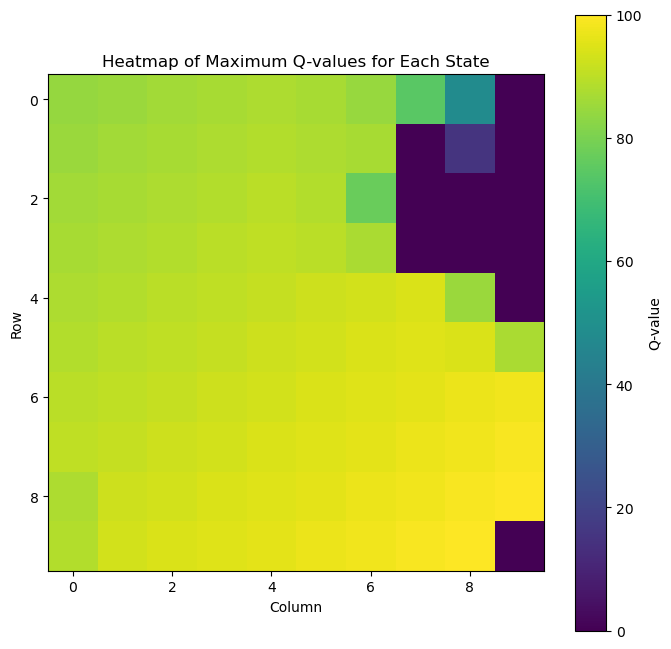

[[ 84.29431934  85.14577711  86.00583546  86.87458128  87.7521023
   86.86261352  84.48396118  74.39357517  48.29292639   0.        ]
 [ 85.14577711  86.00583546  86.87458128  87.7521023   88.63848717
   87.7521023   86.81088948   0.          15.00408556   0.        ]
 [ 86.00583546  86.87458128  87.7521023   88.63848717  89.53382543
   88.63848678  77.28445662   0.           0.           0.        ]
 [ 86.87458128  87.7521023   88.63848717  89.53382543  90.4382075
   89.53382543  87.17340664   0.           0.           0.        ]
 [ 87.7521023   88.63848717  89.53382543  90.4382075   91.35172475
   92.27446944  93.19197365  94.14794469  84.78961226   0.        ]
 [ 88.63848717  89.53382543  90.4382075   91.35172475  92.27446944
   93.20653479  94.14801494  95.09900499  94.14699742  87.41349512]
 [ 89.533824    90.4382075   91.35172475  92.27446944  93.20653479
   94.14801494  95.09900499  96.059601    97.02989987  98.0099734 ]
 [ 90.43819298  91.35172475  92.27446944  93.20653479  94

In [17]:
greed = 0.5

print("Greed at 0.5:")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Greed at 0.1: (very random)


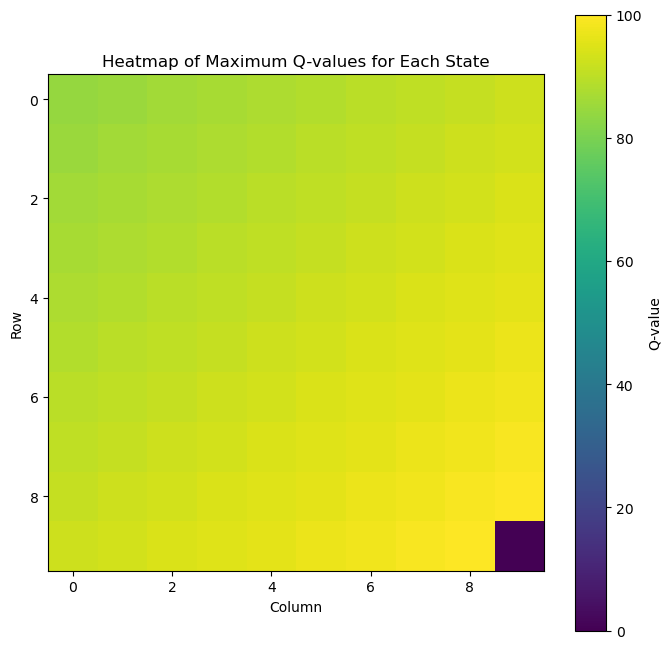

[[ 84.29431934  85.14577711  86.00583546  86.87458128  87.7521023
   88.63848717  89.53382543  90.4382075   91.35172475  92.27446944]
 [ 85.14577711  86.00583546  86.87458128  87.7521023   88.63848717
   89.53382543  90.4382075   91.35172475  92.27446944  93.20653479]
 [ 86.00583546  86.87458128  87.7521023   88.63848717  89.53382543
   90.4382075   91.35172475  92.27446944  93.20653479  94.14801494]
 [ 86.87458128  87.7521023   88.63848717  89.53382543  90.4382075
   91.35172475  92.27446944  93.20653479  94.14801494  95.09900499]
 [ 87.7521023   88.63848717  89.53382543  90.4382075   91.35172475
   92.27446944  93.20653479  94.14801494  95.09900499  96.059601  ]
 [ 88.63848717  89.53382543  90.4382075   91.35172475  92.27446944
   93.20653479  94.14801494  95.09900499  96.059601    97.0299    ]
 [ 89.53382543  90.4382075   91.35172475  92.27446944  93.20653479
   94.14801494  95.09900499  96.059601    97.0299      98.01      ]
 [ 90.4382075   91.35172475  92.27446944  93.20653479  94

In [18]:
agente.reset_q()
greed = 0.1

print("Greed at 0.1: (very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Increasing from 30\% of the tests


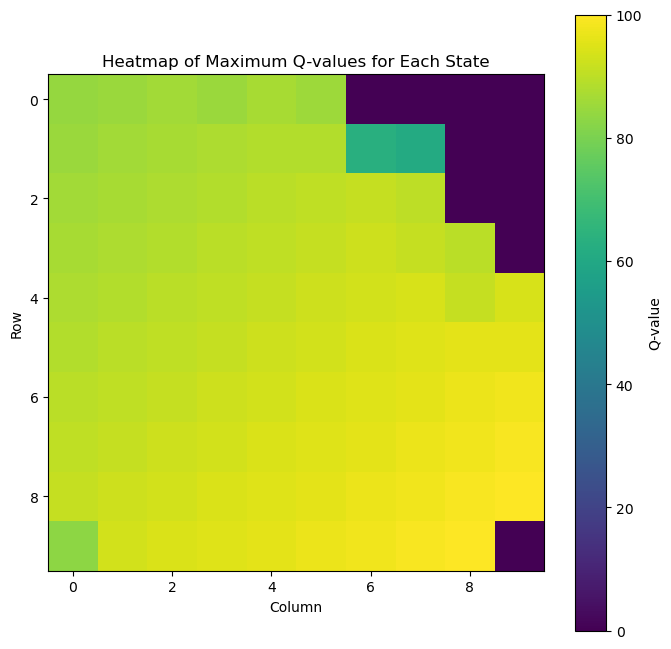

[[ 84.29431934  85.14577711  86.00583546  85.14577333  87.03569931
   85.1854921    0.           0.           0.           0.        ]
 [ 85.14577711  86.00583546  86.87458128  87.75210228  88.63848717
   88.52661482  63.25922894  60.952703     0.           0.        ]
 [ 86.00583546  86.87458128  87.7521023   88.63848717  89.53382543
   90.34318288  91.28315864  90.20930373   0.           0.        ]
 [ 86.87458128  87.7521023   88.63848717  89.53382543  90.4382075
   91.3497456   92.2744694   91.34992627  89.58936209   0.        ]
 [ 87.7521023   88.63848717  89.53382543  90.4382075   91.35172475
   92.27446944  93.20653479  93.97099972  91.23945679  93.91305813]
 [ 88.63848717  89.53382543  90.4382075   91.35172475  92.27446944
   93.20653479  94.14801494  95.09898983  96.05960085  95.91771356]
 [ 89.5338253   90.4382075   91.35172475  92.27446944  93.20653479
   94.14801494  95.09900499  96.059601    97.0299      97.98258791]
 [ 90.41344253  91.35172475  92.27446944  93.20653479  9

In [19]:
agente.reset_q()
greed = 0.9

# Run simulation for 30 episodes
def simulate_increasing_greed(agent, start_iteration=0.3, start_greed=0.3, num_episodes=500, random_miss_prob=0):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode_increasing_greed(current_episode, num_episodes, start_iteration=start_iteration, start_greed=start_greed, random_miss_prob=random_miss_prob)
        #reward, steps, q = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    return rewards, steps_list, q_lista  # Ensure the function returns the values

# greed = 0.1

print("Increasing from 30\% of the tests")

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.3)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 4

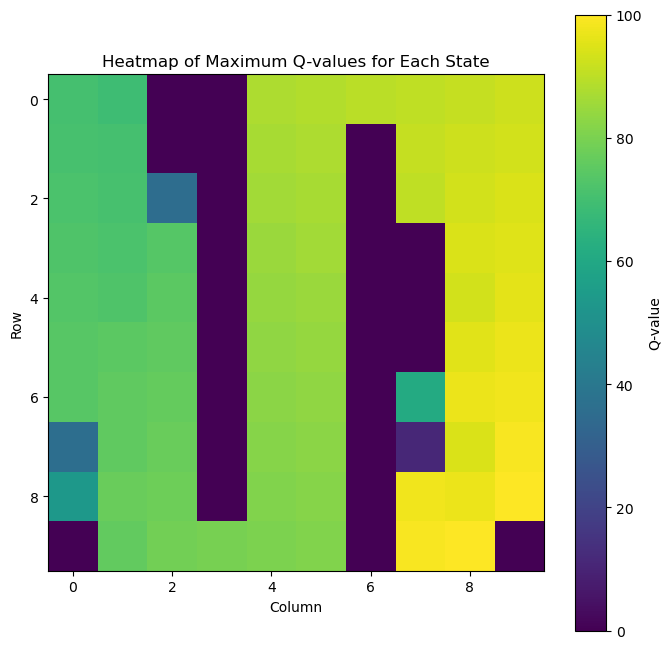

[[ 70.3447695   68.88123495   0.           0.          87.73342843
   88.63848717  89.53382543  90.4382075   91.35160233  92.27446943]
 [ 71.05532273  70.34206292   0.           0.          86.85456986
   87.7521023    0.          91.35172475  92.27446944  93.20653479]
 [ 71.77305326  71.05532171  35.56128265   0.          86.00414261
   86.87458128   0.          90.41842525  93.20653345  94.14801494]
 [ 72.4980336   71.58193142  73.7746157    0.          84.94583876
   86.00583546   0.           0.          94.14554531  95.09900499]
 [ 73.23033697  72.49802205  74.7167534    0.          84.2942745
   85.14577711   0.           0.          93.2502922   96.059601  ]
 [ 73.97003734  74.71720943  75.47192872   0.          83.2485893
   84.29431934   0.           0.          95.4122906   97.0299    ]
 [ 74.10764847  75.47179522  76.23427143   0.          82.61685361
   83.45137615   0.          61.14163806  97.02932247  98.01      ]
 [ 36.1573732   75.7242842   77.00431458   0.          81

In [20]:
agente.reset_q()

agente.env.add_walls()

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.91)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 5

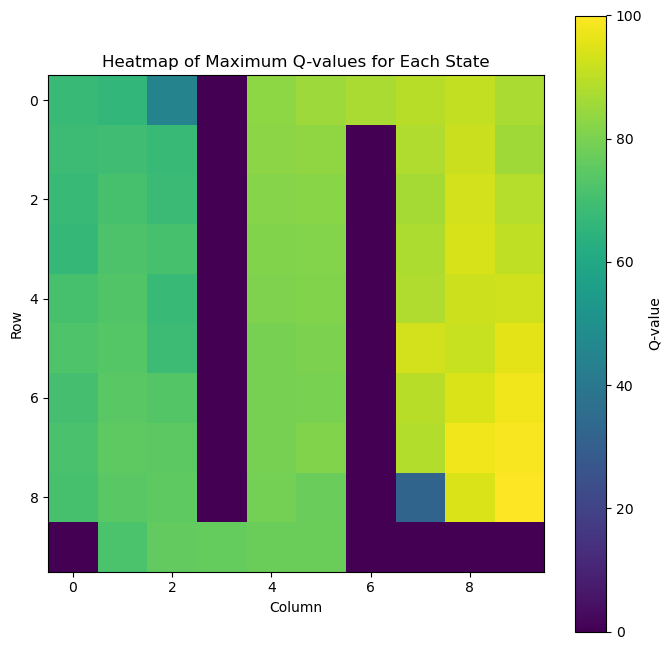

[[67.64666358 66.09411035 44.64790146  0.         83.16124972 85.18658801
  87.38779427 89.37379691 90.90070808 87.27349409]
 [68.3620412  69.32623853 67.56645466  0.         82.43532701 83.33735778
   0.         88.18179146 92.08804226 85.79033852]
 [67.70284176 70.75879054 68.03329919  0.         81.76393463 82.06162815
   0.         86.36329193 93.1023793  88.79238478]
 [66.77208538 72.09727526 70.73623682  0.         81.06848281 81.38986187
   0.         87.79278637 94.07020365 90.30754306]
 [70.78797746 72.98955854 67.57202304  0.         80.51969092 80.91422235
   0.         88.16302481 92.29477906 92.74735801]
 [72.65330917 73.67860802 68.36206728  0.         79.67433732 80.23215972
   0.         93.07441499 91.41344355 95.72372087]
 [70.42382185 74.3859359  73.16976502  0.         79.66558224 79.8218361
   0.         89.20860636 94.51050741 97.83943413]
 [71.3335708  75.07243935 74.79911543  0.         79.49383248 80.92708285
   0.         88.39346063 97.84629207 98.99995423]
 

In [24]:
agente.reset_q()

agente.env.add_walls()

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.91, random_miss_prob=0.05)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()